## 과제3: 정규분포 난수로 히스토그램 만들기 (팬시 인덱싱과 브로드캐스팅 활용)
- 목표: 난수를 생성하고, 직접 구간에 속하는 인덱스를 계산하여 히스토그램을 생성. np.searchsorted를 사용하지 않고 각 값이 어느 구간에 속하는지 확인.

### 구현 순서:

1. 난수 생성:

평균이 0, 표준편차가 1인 정규분포에서 난수 10,000개를 생성하여 data 배열에 저장.

In [1]:
import numpy as np

In [2]:
data = np.random.normal(0, 1, 10000)
data[:10]

array([-1.25126625,  0.62718061, -0.68361094, -0.84773008,  0.31139917,
       -1.31413404, -1.0988452 , -0.26922822,  0.22833726, -0.83613172])

2. 구간 설정:

-10에서 10까지 20개의 구간을 균등하게 나누어 bins 배열.
이 구간들은 히스토그램의 각 구간 경계.

In [6]:
bins = np.linspace(-10, 10, 20)
bins

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

3. 구간 인덱스 계산:

data의 각 값이 어느 구간에 속하는지 직접 계산하여 구간 인덱스 배열 indices에 저장.
예를 들어, data의 값이 특정 구간에 속하면 indices 배열에 그 구간 인덱스를 기록합니다.
이 과정에서 브로드캐스팅과 팬시 인덱싱을 활용하여 효율적으로 구간 인덱스를 계산.

In [18]:
indices = np.sum(data[:, np.newaxis] > bins, axis=1)
indices[:20]

array([11, 11, 10, 10, 10,  9, 12, 10, 10, 10, 11, 10, 10, 11, 10, 10, 10,
       11, 12,  9])

4. 누적 카운팅:

구한 indices 값을 사용하여, 각 구간별로 카운트를 계산.
팬시 인덱싱을 통해 indices에 해당하는 counts 위치에 1씩 누적.

In [19]:
counts = np.zeros_like(bins)
np.add.at(counts, indices, 1)
counts

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 4.400e+01, 5.260e+02, 2.342e+03, 4.042e+03, 2.471e+03,
       5.240e+02, 4.900e+01, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00])

5. 결과 시각화:

구간별 빈도수를 그래프로 시각화하여 히스토그램.
bins와 counts를 사용하여 히스토그램이 올바르게 그려졌는지 확인.

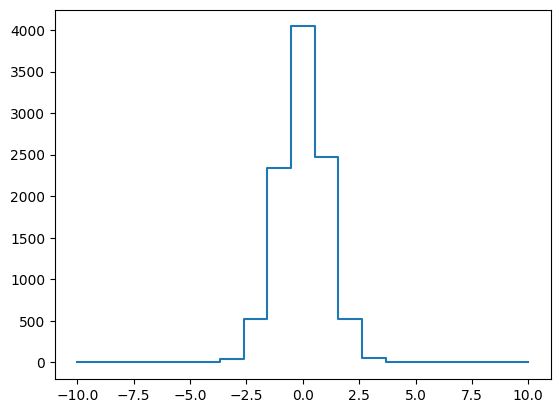

In [20]:
import matplotlib.pyplot as plt
plt.plot(bins, counts, drawstyle='steps')